## Basic SPECT reconstruction example

To run the code below:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

In [1]:
from occiput.Reconstruction.SPECT import SPECT_Static_Scan 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
spect = SPECT_Static_Scan()

spect.set_n_pixels(128,128)
spect.set_gantry_angular_positions(0.0, 360.0, 59) 
spect.load_measurement_from_file('../data/spect/projection.nii')
spect.load_attenuation_from_file('../data/spect/attenuation.nii')
spect.set_pixel_size(4.8,4.8)
spect.set_radius(200.0)
spect.set_psf(fwhm0_mm=5.0, depth_dependence=0.0001)

spect.set_use_gpu(True)

#### Let's give a look at the input data 

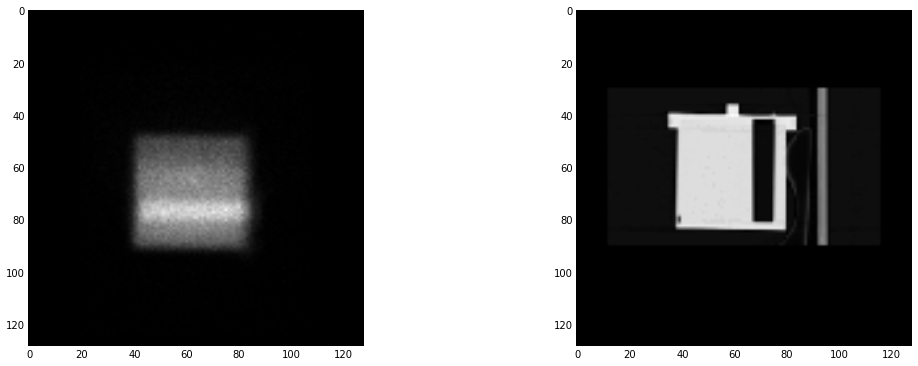

In [18]:
figure(figsize=[18,6])
subplot(1,2,1); imshow(spect._measurement[:,:,10],cmap='gray');
subplot(1,2,2); imshow(spect._attenuation[64,:,:],cmap='gray');

### Reconstruction !

In [30]:
activity = spect.estimate_activity(iterations=10, subset_size=16, subset_mode='random', method='EM') 

<IPython.core.display.Javascript object>

Reconstruction method: EM


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

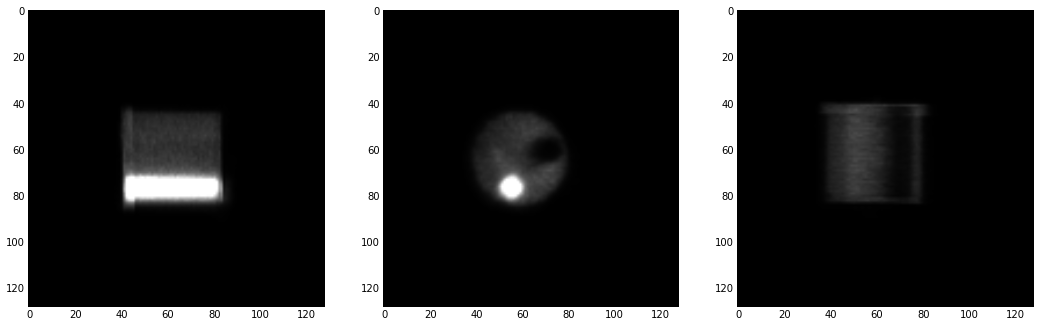

In [31]:
figure(figsize=[18,6])
subplot(131); imshow(activity.data[:,:,55],cmap='gray',vmax=180.0); 
subplot(132); imshow(activity.data[:,55,:],cmap='gray',vmax=180.0); 
subplot(133); imshow(activity.data[64,:,:],cmap='gray',vmax=180.0)

In [32]:
activity.save_to_file('../data/spect/spect_01_reconstruction.nii')